In [ ]:
# Cargar los datos y obtener el modelo
from common import *
mdl, produccion_vars, products = create_model()
solve_model(mdl, produccion_vars, products)


Model: guia5problematipo2
 - number of variables: 3
   - binary=0, integer=0, continuous=3
 - number of constraints: 9
   - linear=9
 - parameters: defaults
 - objective: none
 - problem type is: LP
* Production model solved with objective: 12800
* Total benefit=12800
Production of A: 0
Production of B: 80.0
Production of C: 320.0


In [ ]:
#***Added by JL - 2024 Mar 03th - Checking sensitivity analysis *****')

# Initialize lists to store the results
# rhs_values = []
# dual_values = []

#real_rhs_value = 0

#m = 0.01


In [ ]:
# Funciones para obtener la componente 'y' a registrar.
def get_y_with_min_dem(min_dem_constraint):
    return -1 * min_dem_constraint.dual_value    
def get_y_without_min_dem(prod_var):    
    return -1 * prod_var.reduced_cost

In [ ]:
# Al iterar, si el product_name tiene demanda mínima se desea obtener el VM (dual_value) de dicha restricción,
# o caso contrario el Costo de oportunidad (reduced_cost) del product_name. Esta función analiza si existe o no demanda mínima
# y le indica a iterate_over_rhs cuál de los dos valores se desea obtener al iterar.
def iterate_over_rhs_checking_prod_min_dem(constraint_nameX, product_name):
    # Buscamos el product_name en el array "products" para consultar en su tercera posición si el mismo tiene demanda mínima
    # (aux: products tiene tuplas, esto obtiene la tupla que tiene 'product_name' como primer valor)
    idx = next((i for i, prod in enumerate(products) if prod[0] == product_name), None)
    if idx is None:
        raise ValueError(f"ERROR: no se encontró el product_name: {product_name} en el array products.")

    # Obtenemos la restricción (a la que tomarle el dual_value) si el producto tiene demanda mínima
    # o la variable del producto en caso contrario (al que tomarle el reduced_cost), para llamar a iterar
    dem_min = products[idx][3] > 0
    if dem_min:
        print(f"Demanda mínima encontrada para el producto {product_name}.")
        constraint_nameY = f"DemandMin_{product_name}"
        prod_var_or_min_dem_constraint = mdl.get_constraint_by_name(constraint_nameY)
        get_y_function = get_y_with_min_dem
    else:
        print(f"Demanda mínima No encontrada para el producto {product_name}.")
        # esto da, por ejemplo prod_var_or_min_dem_constraint=list(produccion_vars.values())[0] ## "A"
        # Aux: es necesario que la key sea una tupla? Sería mucho más simple / legible si la key fuera directamente "A"
        prod_var_or_min_dem_constraint = next((value for key, value in produccion_vars.items() if key[0] == product_name), None)
        if prod_var_or_min_dem_constraint is None:
            raise ValueError(f"ERROR: no se encontró {product_name} en produccion_vars.")
        get_y_function = get_y_without_min_dem
        
    return iterate_over_rhs(constraint_nameX, prod_var_or_min_dem_constraint, mdl, products, produccion_vars, get_y_function)


In [ ]:
# Usage of the iterate_over_rhs method, checking whether there exists demmin or not
constraint_nameX = 'Disp_Equipo3'  # The name of the constraint to analyze
product_name="B"

current_rhs_value, rhs_values, dual_values = iterate_over_rhs_checking_prod_min_dem(constraint_nameX, product_name)

Demanda mínima encontrada para el producto B.
[DEBUG] NOMBRES DE LAS RESTRICCIONES:
 ['Disp_Equipo1', 'Disp_Equipo2', 'Disp_Equipo3', 'DemandMax_A', 'DemandMax_B', 'DemandMax_C', 'DemandMin_A', 'DemandMin_B', 'DemandMin_C']
Lower y upper para restr: Disp_Equipo3: (272.0, 1e+20)
[debug] (lower, upper): (272.0, 1e+20)
[DEBUG] DUAL DE CURRENT_RHS: 40.000000000000014
[debug] Viendo para rhs: 271.99
---
- Adjusting RHS to: 271.99
* Production model solved with objective: 12799.7
* Total benefit=12799.7
Production of A: 0.010000000000005116
Production of B: 80.0
Production of C: 319.97333333333336
[debug al append] rhs: 271.99
[debug al append] c_sens.rhs.constant: 271.99
[DEBUG] NOMBRES DE LAS RESTRICCIONES:
 ['Disp_Equipo1', 'Disp_Equipo2', 'Disp_Equipo3', 'DemandMax_A', 'DemandMax_B', 'DemandMax_C', 'DemandMin_A', 'DemandMin_B', 'DemandMin_C']
Lower y upper para restr: Disp_Equipo3: (172.0, 272.0)
[debug] sensitivity (172.0, 272.0)
---
- Adjusting RHS to: 172.0
* Production model solved w

In [ ]:
### DEBUG
print("rhs_values", rhs_values)
print("dual_values", dual_values)

rhs_values [80.0, 140.0, 140.0, 172.0, 172.0, 272.0, 272.0, 300]
dual_values [43.33333333333334, 43.33333333333334, 10.0, 10.0, 22.000000000000004, 22.000000000000004, 40.000000000000014, 40.000000000000014]


In [ ]:

def get_text_for_plot(xunit, yunit):
    xlabel='{0} {1}'.format(constraint_nameX, xunit)
    ylabel='C. Oport \nprod min {}\n{}'.format(yunit, product_name)
    title='Costo de oportunidad del producto {}'.format(product_name)
    return {"xlabel": xlabel, "ylabel": ylabel, "title": title}

plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 43.33333333333334 80.0 140.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 43.33333333333334 140.0 140.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 10.0 140.0 172.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 10.0 172.0 172.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 22.000000000000004 172.0 272.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 22.000000000000004 272.0 272.0
plt.hline dual_values[i], rhs_values[i], rhs_values[i + 1]: 40.000000000000014 272.0 300
[debug] current_x_value: 300


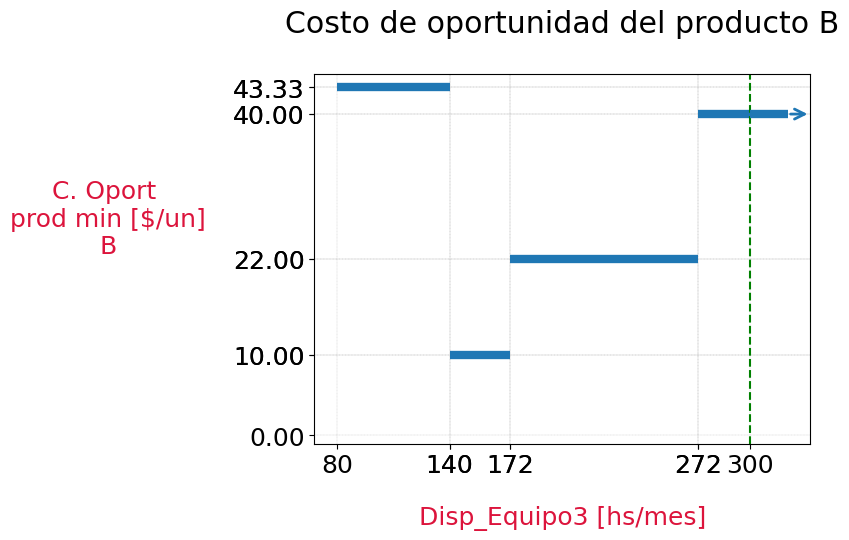

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# Graficamos
plot_text = get_text_for_plot("[hs/mes]", "[$/un]")
plot(rhs_values, dual_values, current_rhs_value, plot_text)